In [1]:
from tensorflow.random import set_seed
from matplotlib import pyplot as plt
import numpy as np
import os
os.chdir('../')

np.random.seed(42)
set_seed(42)

2023-07-03 21:52:43.213312: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-03 21:52:43.245479: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 21:52:43.818289: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from src.utils import load_data
import numpy as np

img_data, label_data = load_data(reshape=False, scale_percent=10, resize_only=True)
images = img_data
images = np.array(images)/255
labels = np.array(label_data)



Loading ../InsulatorsDataSet/03 Extraction/ images...
Loading ../InsulatorsDataSet/04 Extraction/ images...
Loading ../InsulatorsDataSet/05 Extraction/ images...
Loading ../InsulatorsDataSet/06 Extraction/ images...
Loading ../InsulatorsDataSet/07 Extraction/ images...
Loading ../InsulatorsDataSet/08 Extraction/ images...


In [2]:
def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

def train_val_test_split(images, labels, N_VALIDATION, N_TRAIN, N_TEST):
    
    idx = shuffle_along_axis(np.arange(N_VALIDATION+N_TRAIN+N_TEST), 0)
    
    X_train = images[idx[:N_TRAIN]]
    y_train = labels[idx[:N_TRAIN]]

    X_val = images[idx[N_TRAIN:N_TRAIN+N_VALIDATION]]
    y_val = labels[idx[N_TRAIN:N_TRAIN+N_VALIDATION]]

    X_test = images[idx[N_TRAIN+N_VALIDATION:]]
    y_test = labels[idx[N_TRAIN+N_VALIDATION:]]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [60]:
train_ds = Dataset.from_tensor_slices((images, labels))
#train_ds = train_ds.batch(16)

In [61]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(298, 531, 3), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [6]:
from tensorflow.data import Dataset
BATCH_SIZE = 1

train_dataset = Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
val_dataset = Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)

2023-07-01 15:39:37.520678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 15:39:37.520981: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
from tensorflow import keras

model = keras.models.Sequential(
    [
      keras.layers.Conv2D(filters = 128, kernel_size = (11, 11), strides = (4, 4), activation = 'relu', input_shape = (298, 531, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size = (2, 2)),
      keras.layers.Conv2D(filters = 256, kernel_size = (5, 5), strides = (1, 1), activation = 'relu', padding = "same"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size = (3, 3)),
      keras.layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = "same"),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(filters = 256, kernel_size = (1, 1), strides = (1, 1), activation = 'relu', padding = "same"),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(filters = 256, kernel_size = (1, 1), strides = (1, 1), activation = 'relu', padding = "same"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size = (2, 2)),
      keras.layers.Flatten(),
      keras.layers.Dense(1024, activation = 'relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1024, activation = 'relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(6, activation = 'softmax')
    ]
)

model.compile(optimizer = 'nadam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Entrenamiento sin data augmentation

In [8]:
history = model.fit(train_dataset, epochs=100, verbose=1, validation_data=val_dataset)

Epoch 1/100


2023-07-01 15:39:46.798631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [96]
	 [[{{node Placeholder/_1}}]]


96/96 [==============================] - ETA: 0s - loss: 38.8340 - accuracy: 0.1667

2023-07-01 15:40:02.490777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [12]
	 [[{{node Placeholder/_1}}]]


96/96 [==============================] - 16s 146ms/step - loss: 38.8340 - accuracy: 0.1667 - val_loss: 4.9968 - val_accuracy: 0.2500
Epoch 2/100
96/96 [==============================] - 13s 140ms/step - loss: 36.3078 - accuracy: 0.1875 - val_loss: 16.1779 - val_accuracy: 0.1667
Epoch 3/100
96/96 [==============================] - 14s 143ms/step - loss: 38.8678 - accuracy: 0.2083 - val_loss: 8.1688 - val_accuracy: 0.1667
Epoch 4/100
96/96 [==============================] - 14s 151ms/step - loss: 31.1902 - accuracy: 0.2708 - val_loss: 4.6408 - val_accuracy: 0.5000
Epoch 5/100
96/96 [==============================] - 15s 155ms/step - loss: 17.9105 - accuracy: 0.3646 - val_loss: 9.8865 - val_accuracy: 0.2500
Epoch 6/100
96/96 [==============================] - 15s 152ms/step - loss: 12.3553 - accuracy: 0.4062 - val_loss: 3.1773 - val_accuracy: 0.3333
Epoch 7/100
96/96 [==============================] - 14s 147ms/step - loss: 5.1405 - accuracy: 0.5000 - val_loss: 0.9849 - val_accuracy: 0.58

KeyboardInterrupt: 

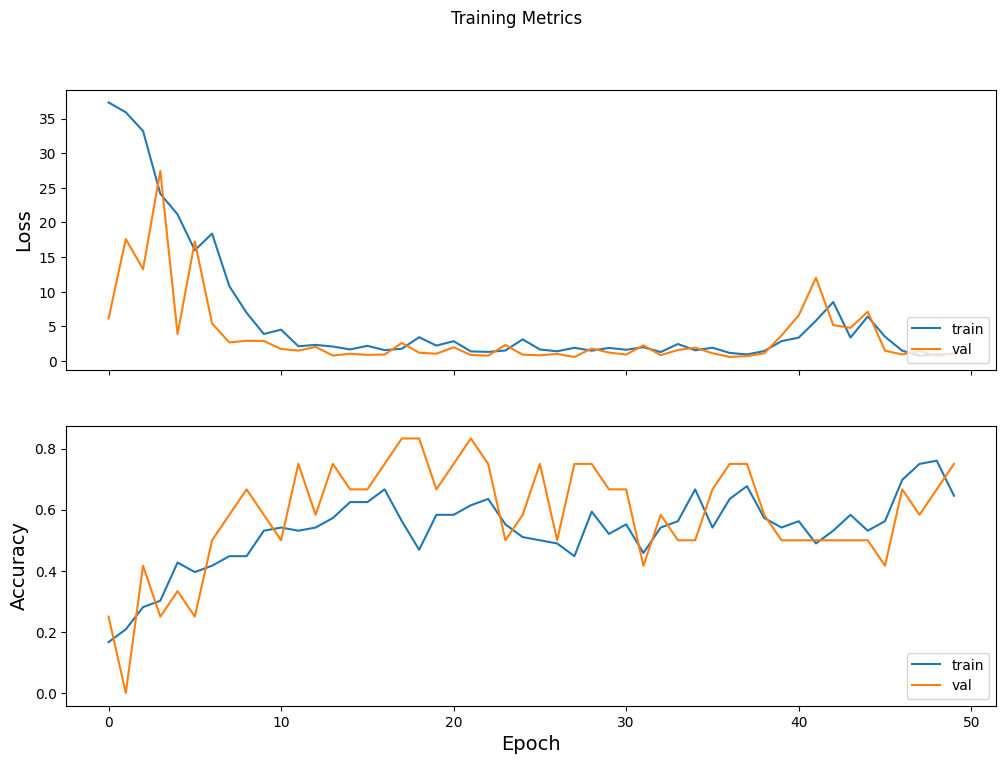

In [69]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics Batch 1')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].legend(['train96', 'val12'], loc='lower right')

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].legend(['train96', 'val12'], loc='lower right')
plt.savefig('alexnet_batch_1_train96_val12.png')
plt.show()


In [70]:
model.evaluate(x=X_test, y=y_test)

1/1 [==============================] - 0s 235ms/step - loss: 3.2018 - accuracy: 0.4167


[3.201848030090332, 0.4166666567325592]

# Entrenamiento con data augmentation

In [3]:
import pickle

with open("data_set_aumentado.p", "rb") as f:
    [new_images, new_labels] = pickle.load(f)

In [4]:
import tensorflow as tf

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = tf.data.Dataset.from_tensor_slices((new_images, new_labels))
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)


2023-07-01 17:19:57.921983: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 17:19:57.922153: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 17:19:57.922223: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [5]:
from tensorflow import keras

model = keras.models.Sequential(
    [
      keras.layers.Conv2D(filters = 128, kernel_size = (11, 11), strides = (4, 4), activation = 'relu', input_shape = (298, 531, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size = (2, 2)),
      keras.layers.Conv2D(filters = 256, kernel_size = (5, 5), strides = (1, 1), activation = 'relu', padding = "same"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size = (3, 3)),
      keras.layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = "same"),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(filters = 256, kernel_size = (1, 1), strides = (1, 1), activation = 'relu', padding = "same"),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(filters = 256, kernel_size = (1, 1), strides = (1, 1), activation = 'relu', padding = "same"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size = (2, 2)),
      keras.layers.Flatten(),
      keras.layers.Dense(1024, activation = 'relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1024, activation = 'relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(6, activation = 'softmax')
    ]
)

model.compile(optimizer = 'nadam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(np.array(new_images), np.array(new_labels), epochs=10, verbose=1)

In [ ]:
N_VALIDATION = 132
N_TRAIN = 1056
N_TEST = 132

XX_train, XX_val, XX_test, yy_train, yy_val, yy_test = train_val_test_split(np.array(new_images),
                                                                            np.array(new_labels),
                                                                            N_VALIDATION,
                                                                            N_TRAIN,
                                                                            N_TEST)

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2023-07-01 17:19:18.998331: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-01 17:19:19.029029: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 17:19:19.557698: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


2023-07-01 17:19:20.199447: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 17:19:20.215606: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 17:19:20.215791: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf